# 数据概览

In [10]:
AllData = pd.read_csv("input/bank.csv", header=0)
AllData["y2"] = AllData["y"].apply(lambda x: int(x=="yes"))
AllData[:5]

,age,job,marital,education,default,spending,housing,cash_loan,contact_number_type,maturity,app_channel,max_late_charge,cash_withdraw_freq,poutcome,y,y2
0,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,success,no,0
1,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,success,no,0
2,35,management,single,tertiary,no,747,no,no,cellular,141,2,176,3,success,no,0
3,43,services,married,primary,no,200,yes,yes,cellular,313,1,147,2,success,no,0
4,31,blue-collar,married,secondary,no,360,yes,yes,cellular,89,1,241,1,success,no,0


## 列名称

In [24]:
AllData.columns

Index(['age', 'job', 'marital', 'education', 'default', 'spending', 'housing',
       'cash_loan', 'contact_number_type', 'maturity', 'app_channel',
       'max_late_charge', 'cash_withdraw_freq', 'poutcome', 'y', 'y2'],
      dtype='object')

## 数据描述

In [46]:
AllData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
age                    4521 non-null int64
job                    4521 non-null object
marital                4521 non-null object
education              4521 non-null object
default                4521 non-null object
spending               4521 non-null int64
housing                4521 non-null object
cash_loan              4521 non-null object
contact_number_type    4521 non-null object
maturity               4521 non-null int64
app_channel            4521 non-null int64
max_late_charge        4521 non-null int64
cash_withdraw_freq     4521 non-null int64
poutcome               4521 non-null object
y                      4521 non-null object
y2                     4521 non-null int64
dtypes: int64(7), object(9)
memory usage: 565.2+ KB


In [47]:
AllData.describe()

,age,spending,maturity,app_channel,max_late_charge,cash_withdraw_freq,y2
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1518.561823,154.969918,2.793630,40.586154,0.542579,0.115240
std,10.576211,2964.069123,92.806829,3.109807,99.787552,1.693562,0.319347
min,19.000000,200.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,33.000000,200.000000,80.000000,1.000000,0.000000,0.000000,0.000000
50%,39.000000,478.000000,143.000000,2.000000,0.000000,0.000000,0.000000
75%,49.000000,1490.000000,222.000000,3.000000,0.000000,0.000000,0.000000
max,87.000000,71188.000000,364.000000,50.000000,871.000000,25.000000,1.000000


# 数据预处理

In [41]:
from sklearn import tree
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing

attributes = ['age', 'spending', 'maturity', 'max_late_charge']

dummies_job = pd.get_dummies(AllData["job"], prefix="job")
dummies_marital = pd.get_dummies(AllData["marital"], prefix="marital")
dummies_education = pd.get_dummies(AllData["education"], prefix="education")
dummies_default = pd.get_dummies(AllData["default"], prefix="default")
dummies_housing = pd.get_dummies(AllData["housing"], prefix="housing")
dummies_cash_loan = pd.get_dummies(AllData["cash_loan"], prefix="cash_loan")
dummies_contact_number_type = pd.get_dummies(AllData["contact_number_type"], prefix="contact_number_type")
dummies_poutcome = pd.get_dummies(AllData["poutcome"], prefix="poutcome")

data = AllData[attributes]
data = pd.concat([dummies_job, dummies_marital, dummies_education, dummies_default, dummies_housing,
                 dummies_cash_loan, dummies_contact_number_type, dummies_poutcome], axis=1)
target = AllData["y2"]
data[:5]

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housing_yes,cash_loan_no,cash_loan_yes,contact_number_type_cellular,contact_number_type_telephone,contact_number_type_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,1,0


# 参与模型的特征

In [45]:
pd.DataFrame({"feature": list(data.columns)})

,feature
0,job_admin.
1,job_blue-collar
2,job_entrepreneur
3,job_housemaid
4,job_management
5,job_retired
6,job_self-employed
7,job_services
8,job_student
9,job_technician


# 训练模型

In [44]:
X = data.as_matrix()
y = target.as_matrix()

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, y)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# 可视化决策树

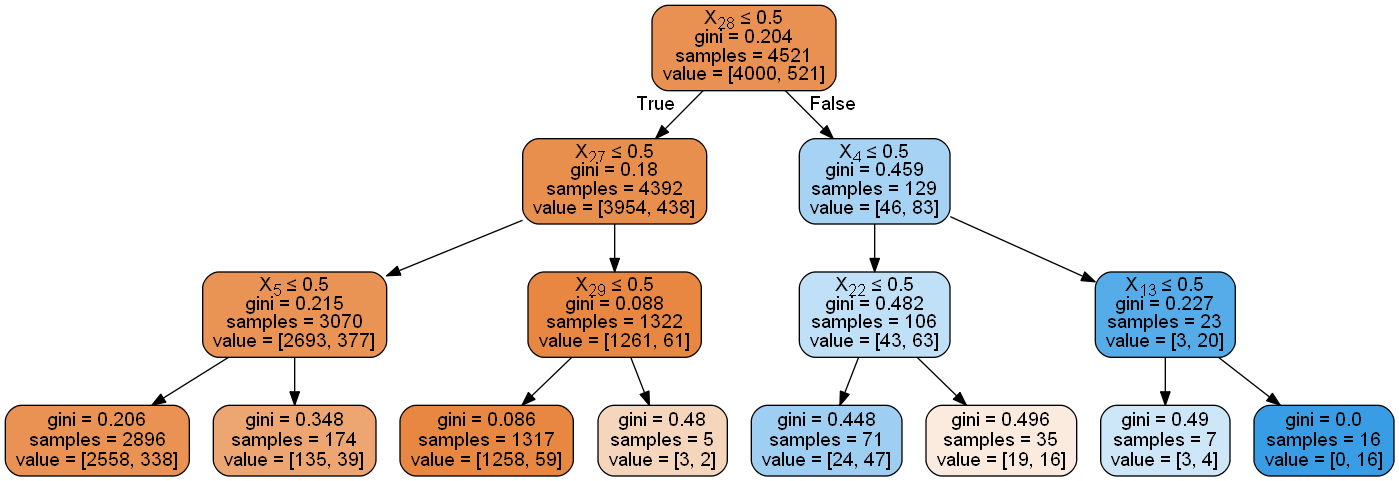

In [43]:
from IPython.display import Image

dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)

import pydotplus
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())